### Importing Library

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import plotly.express as px
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols


/Users/dominicabogado/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Importing Data

In [3]:
df = pd.read_csv('diabetes.csv')

## Data Cleaning

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The decribe function showed that there were numerous minimum values of 0 in categories where it did not make sense such as Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI. These values were replaced using the mean value of each category

In [6]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

Once the values had been replaced, describe was used again to show there were no longer any 0 values in the categories where it made no sense.

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

The column types all aligned with the data found in them.

## Data Analysis

The first step in data analysis was to create a correlation matrix to find interesting relationships between the outcome and pregnancies.

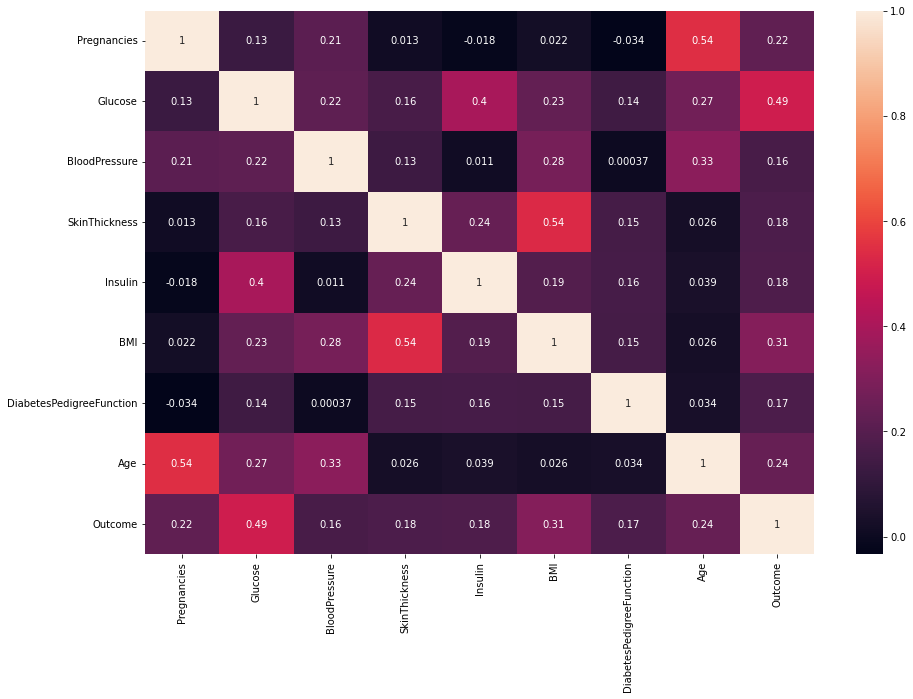

In [9]:
corr_matrix = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix,annot = True);
plt.savefig('DiabetesHeatMap.png')

By looking at correlation matrix, we can see that the variable with the highest correlation to Outcome is Glucose. Additionally, the variables with the highest correlation to Glucose was Age and Insulin. Lastly, Age and Pregnancies had the highest correlation of all variables

The next step was to compare the diabetes diagnosis across the number of pregnancies

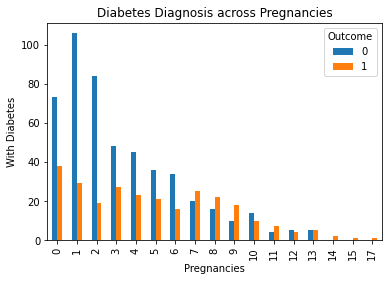

In [10]:
%matplotlib inline
pd.crosstab(df.Pregnancies,df.Outcome).plot(kind='bar')
plt.title('Diabetes Diagnosis across Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('With Diabetes')
plt.savefig('PregnantComp.png')

This graph shows that between the women who have been pregnant 0 to 6 times, more did not have diabetes. It also showed that there were more women with diabetes who had been pregnant 7 or more times than without diabetes.

A box plot was created to visualize the difference of means in pregnancy, age, insulin, and glucose between those with and without diabetes


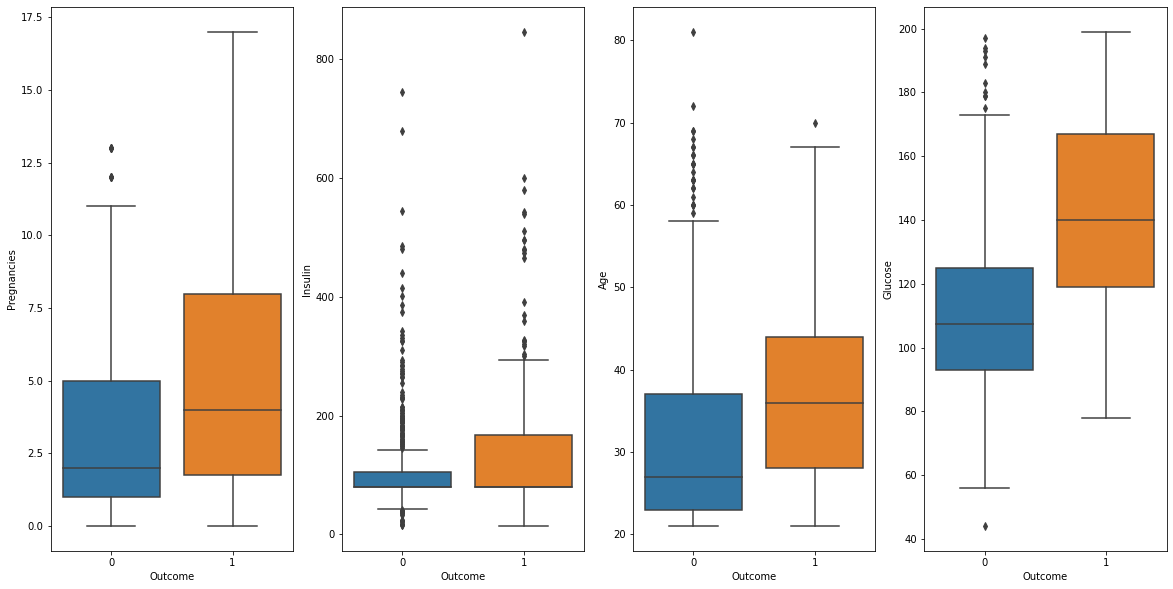

<Figure size 432x288 with 0 Axes>

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=4,figsize=(20,10))
sns.boxplot(data=df, y="Pregnancies", x="Outcome", ax=axs[0])
sns.boxplot(data=df, y="Insulin", x="Outcome", ax=axs[1])
sns.boxplot(data=df, y="Age", x="Outcome", ax=axs[2])
sns.boxplot(data=df, y="Glucose", x="Outcome", ax=axs[3])
plt.show()
plt.draw()
plt.savefig('BoxPlot.png')

We can see that there is a difference in the means across these variables. To verify if the means are significant, TTests were run to find the P-Value and Cohens D.


In [13]:
new_df = df[['Pregnancies','Age','Glucose','Insulin','Outcome']]
df_with = new_df[new_df['Outcome'] == 1]
df_without = new_df[new_df['Outcome'] == 0]

category= pd.cut(new_df.Pregnancies,bins=[-1,0,6,17],labels=['None','Average','High'])
new_df.insert(1,'PregnantCategory',category)


### ANOVAS

In [14]:
aov = pg.anova(data=new_df, dv='Pregnancies', between='Outcome', detailed=True)
print(aov)

    Source           SS   DF          MS          F         p-unc       np2
0  Outcome   428.799019    1  428.799019  39.670227  5.065127e-10  0.049239
1   Within  8279.762179  766   10.809089        NaN           NaN       NaN


In [15]:
aov = pg.anova(data=new_df, dv='Age', between='Outcome', detailed=True)
print(aov)

    Source             SS   DF           MS          F         p-unc       np2
0  Outcome    6026.695153    1  6026.695153  46.140611  2.209975e-11  0.056814
1   Within  100051.741045  766   130.615850        NaN           NaN       NaN


In [16]:
aov = pg.anova(data=new_df, dv='Insulin', between='Outcome', detailed=True)
print(aov)

    Source            SS   DF             MS          F         p-unc  \
0  Outcome  2.133615e+05    1  213361.496162  25.410089  5.788430e-07   
1   Within  6.431890e+06  766    8396.723812        NaN           NaN   

        np2  
0  0.032107  
1       NaN  


In [17]:
aov = pg.anova(data=new_df, dv='Glucose', between='Outcome', detailed=True)
print(aov)

    Source             SS   DF             MS           F         p-unc  \
0  Outcome  172624.903137    1  172624.903137  245.833856  2.937418e-48   
1   Within  537886.350890  766     702.201502         NaN           NaN   

        np2  
0  0.242959  
1       NaN  


In comparing the means of pregnancies, age, insulin, and glucose between those with and without diabetes we can see a P-Value below 0.05 across all three variables. We can conclude that there is a significant difference of means across groups. Post Hoc tests must now be conducted to observe the effect size of the means.

### Post-Hoc Tests to observe effect size

In [18]:
pt = pg.pairwise_tukey(dv='Pregnancies', between='Outcome', effsize = 'cohen', data=new_df)
print(pt)

   A  B  mean(A)   mean(B)      diff        se         T  p-tukey     cohen
0  0  1    3.298  4.865672 -1.567672  0.248899 -6.298431    0.001 -0.476827


In [19]:
new_df.pairwise_tukey(dv='Age', between='Outcome', effsize='cohen')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,0,1,31.19,37.067164,-5.877164,0.865219,-6.792688,0.001,-0.514245


In [20]:
new_df.pairwise_tukey(dv='Insulin', between='Outcome', effsize='cohen')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,0,1,106.457354,141.426597,-34.969243,6.937183,-5.040842,0.001,-0.38162


In [21]:
new_df.pairwise_tukey(dv='Glucose', between='Outcome', effsize='cohen')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,0,1,110.705367,142.159661,-31.454293,2.00613,-15.67909,0.001,-1.186995


### Anova Observations

Though we found statistical significance between the means, a Post Hoc test was conducted to evaluate the effect size.  Pregnancies and Insulin had medium effect sizes while Age had a large effect size. Glucose had the largest Cohen D with -1.186 meaning the mean is larger than one standard deviation from the mean.

Using the results of the ANOVA and Post-Hoc tests, we can speculate that there is an increased chance that women who had been pregnant more often were also diagnosed with some form of diabetes. This also supports the data that suggests women with gestational diabetes are more likely to contract Type 2 diabetes. 


## Linear Regression model

We know from the analysis that Glucose has significance to Diabetes. This linear regression model was developed to explore if Glucose levels can be predicted using Pregnancies, Age and Insulin.

In [22]:
X = new_df[['Pregnancies', 'Age','Insulin']]
y = new_df['Glucose']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Pregnancies,-0.148041
Age,0.716549
Insulin,0.122853


In [26]:
y_pred = regressor.predict(X_test)

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
661,199.0,108.819537
122,107.0,111.869736
113,76.0,110.525060
14,166.0,140.702938
529,111.0,115.416515
...,...,...
476,105.0,127.348637
482,85.0,108.890902
230,142.0,108.375415
527,116.0,113.052508


In [28]:
print (regressor.score(X_test, y_test))

0.17438289303971344


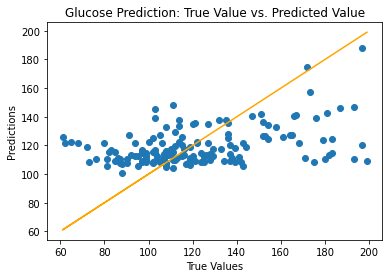

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Glucose Prediction: True Value vs. Predicted Value")


a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, y_test, color='orange')


plt.savefig('NewGlucoseResults.png')

The linear regression model only has a 17% accuracy. The visualization shows that the model was accurate when predicting Glucose levelsbeterrn 110 to 120 however over predicted when Glucose levels were in the low 60's to 80's and under predicted when glucose levels were above 160.

In conclusion, tho pregnancies, age, and insulin are significant variables in patients with diabetes, they are not ideal when predicting Glucose levels.